## From the Attrition data set, find the correlation between Attrition & other features of the data set 

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
data = pd.read_csv('general_data.csv')
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


.

### Changing the values of string 'Yes' & 'No" to integer

In [102]:
data.Attrition[data.Attrition == 'Yes'] = 1
data.Attrition[data.Attrition == 'No'] = 0
data.BusinessTravel[data.BusinessTravel == 'Non-Travel'] = 0
data.BusinessTravel[data.BusinessTravel == 'Travel_Rarely'] = 1
data.BusinessTravel[data.BusinessTravel == 'Travel_Frequently'] = 2
print(data.head())

   Age Attrition BusinessTravel              Department  DistanceFromHome  \
0   51         0              1                   Sales                 6   
1   31         1              2  Research & Development                10   
2   32         0              2  Research & Development                17   
3   38         0              0  Research & Development                 2   
4   32         0              1  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                1

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel pac

In [103]:
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,1,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,2,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,2,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,0,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,1,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,1,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,0,1,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,0,1,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,0,1,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [104]:
data.isnull()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [105]:
data.dropna(inplace=True)
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,1,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,2,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,2,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,0,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,1,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,1,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,0,1,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,0,1,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,0,1,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


.

In [106]:
from scipy.stats import pearsonr

### 1. Find the correlation between Attrition & Business travel

Hypothesis- There is not a significant relationship between Attrition rate & Business travel status

In [107]:
stats,p = pearsonr(data.Attrition,data.BusinessTravel)
print(stats,p)

0.12530593310429708 8.411436982026511e-17


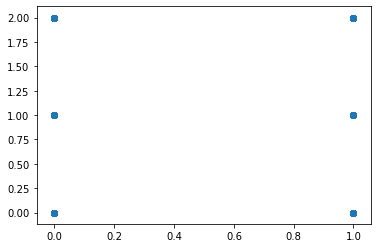

In [108]:
plt.scatter(data.Attrition,data.BusinessTravel)

#### From the above values we can see that the 'p' value is much less than 0.05 so the null hypothesis is not accepted.

Therefore the alternate hypothesis that, there is a significant relationship between the Attrition rate & Business travel status.

.

### 2.  Attrition v/s Distance from home

Hypothesis: Ther is no significant correlation between Attrition & distance from home

-0.009448638515156224 0.5317715668019558


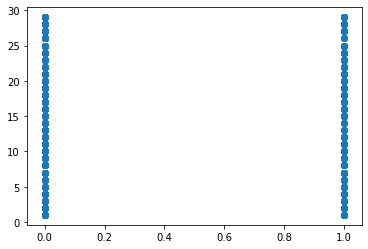

In [109]:
stats,p = pearsonr(data.Attrition,data.DistanceFromHome)
print(stats,p)
plt.scatter(data.Attrition,data.DistanceFromHome)

##### from above 'p' value = 0.53 which is >0.05,thus null hypothesis is accepted

Therefore, there is a significant correlation between Attrition & distance from home

### 3. Attrition v/s Age

Hypothesis: The age of person doesn't have any significance in attrition of the employee

-0.15839867954096665 5.1265982193804103e-26


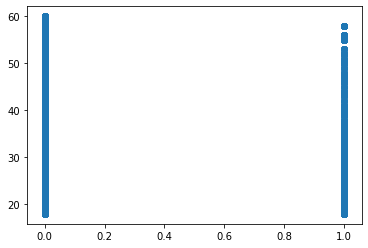

In [110]:
stats,p = pearsonr(data.Attrition,data.Age)
print(stats,p)
plt.scatter(data.Attrition,data.Age)

### 3. Age vs Percent salary hike

Hypothesis: The person's age has no significance in his/her salary hike precent

In [111]:
stats,p = pearsonr(data.Age,data.PercentSalaryHike)
print(stats,p)


-0.03256116284960469 0.031130755678860606


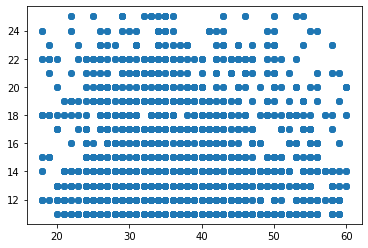

In [112]:
plt.scatter(data.Age,data.PercentSalaryHike)

##### From the above 'p' values which is less than 0.05 the null hypothesis is rejected 
##### The plot tells us that there is 0 correlation between both the variables


### Attrition v/s Education	

Hypothesis: There is no significant correlation between attrition rate & education

In [113]:
stats,p = pearsonr(data.Attrition, data.Education)
print(stats,p)

-0.01710630705027883 0.2575753930816355


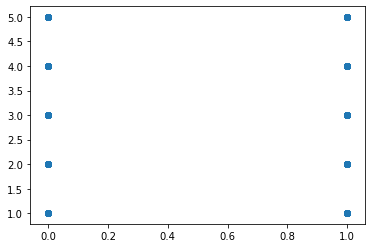

In [115]:
plt.scatter(data.Attrition,data.Education)

##### As observed the "p" value for the above realtion is >0.05 so the null hypothesis is accepted

Therefore, there is no significant relationship between the attrition & education

### Attrition v/s NumCompaniesWorked

Null Hypothesis: There is no significant correlation between the Attrition & Number of companies one has worked

In [117]:
stats,p = pearsonr(data.Attrition, data.NumCompaniesWorked)
print(stats,p)

0.04283056724472072 0.004572057121621882


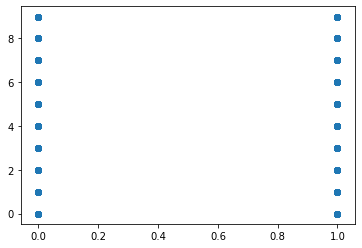

In [118]:
plt.scatter(data.Attrition, data.NumCompaniesWorked)

##### from above 'p' value which is less than 0.05 it is clear that the the null hypothesis should be rejected

therefore Ha- There is a significant correlation between the Attrition & NumCompaniesWorked 

### Attrition v/s PercentSalaryHike

Hypothesis: There is no significant correlation between Attrition & Percentage of salary hike for an individual

In [120]:
stats,p = pearsonr(data.Attrition, data.PercentSalaryHike)
print(stats, p)

0.03315303713546652 0.028192446935106384


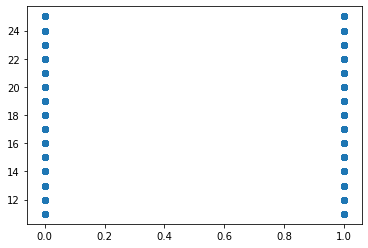

In [122]:
plt.scatter(data.Attrition,data.PercentSalaryHike)

##### From above 'p' value which is 0.028 < 0.05, so the null hypothesis is not acepted.

Therefore, there is a significance correlation between Attrition & PercentSalaryHike

### Attrition v/s StockOptionLevel

Null Hypothesis: There is no significant correlation between the Attrition & StockOptionLevel

In [125]:
stats,p = pearsonr(data.Attrition, data.StockOptionLevel)
print(stats, p)

-0.008164026684984426 0.588999635830954


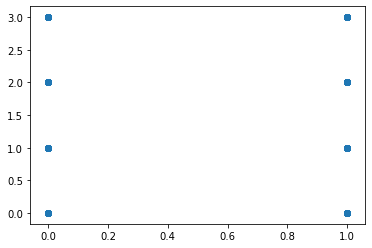

In [127]:
plt.scatter(data.Attrition, data.StockOptionLevel)

##### from above 'p' value 0.588 which is >0.05, thus the null hypothesis is accepted

Therefore, there is no significant correlation between Attrition & StockOptionLevel

### Attrition v/s TotalWorkingYears	

Null Hypothesis: There is no significant correlation between Attrition & TotalWorkingYears	

In [129]:
stats,p = pearsonr(data.Attrition, data.TotalWorkingYears)
print(stats, p)

-0.1696699168472389 1.1645434967097149e-29


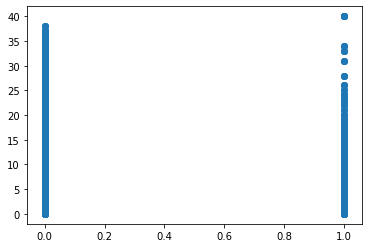

In [131]:
plt.scatter(data.Attrition,data.TotalWorkingYears)

##### from above 'p' = 1.16 which is >0.05, therefore the null hypothesis is accepted

Therefore, there is no significance correlation between the Attrition Yes, No & TotalWorkingYears	

### Attrition v/s YearsSinceLastPromotion	
Null Hypothesis- there is no significant correlation between Attrition & YearsSinceLastPromotion	

In [132]:
stats,p = pearsonr(data.Attrition, data.YearsSinceLastPromotion	)
print(stats,p)

-0.031423150563309916 0.03752293607395154


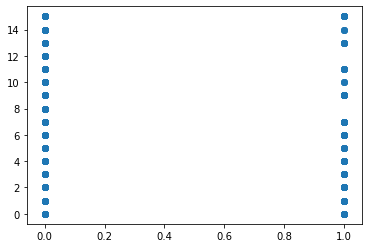

In [134]:
plt.scatter(data.Attrition,data.YearsSinceLastPromotion)

##### from above 'p' = 0.03 which is <0.05 thus, Null hypothesis is rejected

Therefore, there is a significant correlation between the Attrition & YearsSinceLastPromotion

### Attrition v/s YearsWithCurrManager

Null Hypothesis: There is no correlation between the Attrition & YearsWithCurrManager

In [135]:
stats,p = pearsonr(data.Attrition, data.YearsWithCurrManager)
print(stats,p)

-0.1546915369028727 7.105369646771178e-25


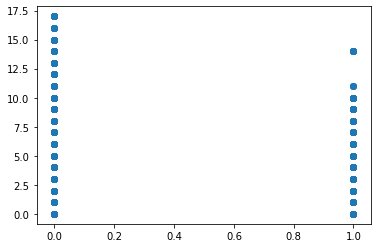

In [136]:
plt.scatter(data.Attrition, data.YearsWithCurrManager)

##### From above 'p' value which is much less than 0.05, thus the null hypothesi is rejeted

Therefore, there is a significant correlation between Attrition & YearsWithCurrManager 